In [1]:
import os
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from indoNLP.preprocessing import *

In [2]:
list_data = [ 'januari-2021.csv', 'februari-2021.csv', 'maret-2021.csv',
              'april-2021.csv', 'mei-2021.csv', 'juni-2021.csv',
              'juli-2021.csv', 'agustus-2021.csv', 'september-2021.csv',
              'oktober-2021.csv', 'november-2021.csv', 'desember-2021.csv' ]

local = "../data/"
if os.path.isdir(local):
    main_dir = local
else:
    main_dir = "https://raw.githubusercontent.com/Hyuto/skripsi/master/data/"

In [3]:
data = pd.concat([pd.read_csv(f"{main_dir}{x}") for x in list_data])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 371389 entries, 0 to 15903
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     371389 non-null  object
 1   url      371389 non-null  object
 2   user     371389 non-null  object
 3   content  371389 non-null  object
dtypes: object(4)
memory usage: 14.2+ MB


In [4]:
data["date"] = pd.to_datetime(data["date"]).dt.tz_localize(None)
data.drop_duplicates("content", inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364011 entries, 0 to 15903
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     364011 non-null  datetime64[ns]
 1   url      364011 non-null  object        
 2   user     364011 non-null  object        
 3   content  364011 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 13.9+ MB


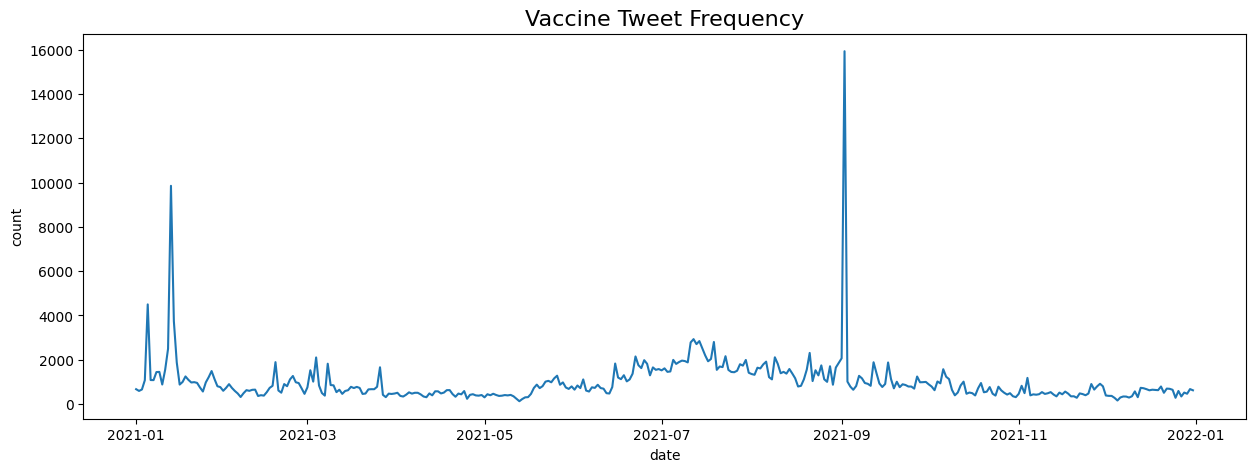

,date,count
0,2021-09-02,15931
1,2021-01-13,9855
2,2021-01-05,4501
3,2021-01-14,3743
4,2021-07-12,2933


In [5]:
tweet_freq = data["date"].dt.floor('d').value_counts().rename_axis('date').reset_index(name='count')
plt.figure(figsize=(15,5))
sns.lineplot(x = "date", y = "count", data = tweet_freq)
plt.title("Vaccine Tweet Frequency", fontsize=16)
plt.show()

tweet_freq.sort_values("count", ascending=False).head(5)

In [6]:
def preprocessing(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text, flags=re.UNICODE)  # remove whitespace
    text = emoji_to_words(text)  # remove emoji
    text = remove_html(text)  # remove html tags
    text = remove_url(text)  # remove url
    text = replace_slang(text) # replace slang words
    text = replace_word_elongation(text)
    text = remove_stopwords(text)
    text = text.translate(str.maketrans("", "", string.digits))  # remove numbers
    text = text.translate(
        str.maketrans(string.punctuation, " " * len(string.punctuation))
    )  # remove punctuation
    return " ".join(text.split())

In [7]:
cleaned = [preprocessing(x) for x in tqdm(data["content"].values)]

  0%|          | 0/364011 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [34]:
from sklearn.feature_extraction.text import CountVectorizer

In [35]:
tf_vectorizer = CountVectorizer()
tf = tf_vectorizer.fit_transform(cleaned)

In [36]:
tf_mat = tf.toarray()
docs = tf_mat[(tf_mat>10).any(axis=1)]
words = np.array(tf_vectorizer.get_feature_names())
doc = docs[1] 
idx = (doc>0)
doc_words = words[idx]
doc_counts = doc[doc>0]
frequencies = dict(zip(doc_words, doc_counts))
frequencies

MemoryError: Unable to allocate 463. GiB for an array with shape (364011, 170671) and data type int64